# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Цель исследования
Определить какие параметры и как влияют на рыночную стоимость объектов недвижимости для построения автоматизированной системы отслеживания аномалий и мошеннической деятельности.

## Изучение данных из файла

In [1]:
#импортируем библиотек
import pandas as pd
import matplotlib.pyplot as plt 

#читаем файл и выводим основную информацию 
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.info()
print(df.shape)

#проверка уникальных и пропущенных значений в столбцах таблицы циклом:
for col in df.columns:
    print('Уникальные значения')
    print(df[col].value_counts())
    print('Кол-во пропущенных')
    print(df[col].isna().sum())
#выведем 5 верхних строчек
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### Комментарий
Данные в исходном файле разделены табуляцией, поэтому указываем этот тип разделителя при чтении данных.

В следующих столбцах есть пропущенные значения:

ceiling_height - потолки с высотой есть везде, но не все знают высоту потолка и указывают ее, заменять ее какими-либо характерными значениями нецелесообразно, оставим пустыми. 9195 пропусков.

floors_total -  всего 86 пропусков, целесообразно удалить строки без указания этажности дома.

living_area - аналогично, пустые. 1903 пропусков.

kitchen_area  - аналогично, пустые. 2278 пропусков.

airports_nearest - не указано, значит нет картографических данных, оставим пустыми. 5542 пропусков.

cityCenters_nearest - не указано, значит нет картографических данных, оставим пустыми. 5519 - примерно столько же, сколько и по аэропортам.

parks_nearest - не указано, значит нет картографических данных, оставим пустыми. 15620 пропущеною

ponds_nearest - не указано, значит нет картографических данных, оставим пустыми. 14589 - пропущено.

parks_around3000 - скорее всего пропущенные значения - нет парков в указанной зоне, заменим нулями. 5518 пропусков.

ponds_around3000 - скорее всего пропущенные значения - нет водоемов в указанной зоне, заменим нулями. Пропусков столько же, сколько по паркам.

is_apartment - скорее всего пропущенные значения - не апартаменты, иначе это было бы указано, заменим нулями

balcony - скорее всего пропущенные значения - без балкона, иначе кол-во было бы указано, заменим нулям

days_exposition - возможно пропущенные значения - это новые, еще не снятые объявления, целесообразно заменить нулями

locality_name - нужны ли нам вообще строчки без населенного пункта? Возможно это вообще не Санкт-Петербург и его окрестности.

Есть переменные, где после замены/удаления пропущенных значений необходима корректировка типа данных:

last_price, total_area, floors_total, balcony, parks_around3000, ponds_around3000 float64 –> int64

first_day_exposition  object -> datetime

is_apartment object -> bool



float64 --> int64 - проще работать, лучшая точность, меньше памяти
object -> bool - булев тип для is_apartment
object -> datetime - для first_day_exposition 

### Вывод

В выборке 23699 объявлений.
Поверхностный анализ показал, что:
- ок.70% объявлений - 1-2 комнатные квартиры
- ок.70% объявлений - Санкт-Петербург
- ок.40% объявления - в 5-этажных и 9-этажных домах
- ок.40% - без парков и водоемов в радиусе 3 км. c учетом пропусков ок 70%
- 50 апартаментов
- 149 студий
- 67 со свободной планировкой

Выявлены столбцы с пропущенными значениями. 
Принято решение заменить нулями пропуски в столбцах:
парки/водоемы в радиусе 3км,
апартаменты,
балкон.

Объявление без населенных пунктов (49 шт) и без указания этажности дома (86 шт) целесообразно удалить < 1% от выборки.

Также в ряде столбцов необходимо скорректировать тип данных.

## Предобработка данных

In [2]:
#удалим строки с пропущенным населенным пунктом и без указания кол-ва этажей в доме и проверим кол-во оставщихся строк
df.dropna(subset = ['locality_name', 'floors_total'], inplace = True)
#заменим пропуски нулями в столбцах наличия парков/водоемов, типа апартаменты, балконов, дней с момента размещения объявления
df[['parks_around3000', 'ponds_around3000', 'is_apartment', 'balcony', 'days_exposition']] = df[['parks_around3000', 'ponds_around3000', 'is_apartment', 'balcony', 'days_exposition']].fillna(0)
#изменим типы данных
df[['last_price', 'total_area', 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000']] = df[['last_price', 'total_area', 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000']].astype('int')
df['is_apartment'] = df['is_apartment'].astype('bool')
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format= '%Y-%m-%dT%H:%M:%S')
#проверим полные дубликаты
print('Полных дубликатов в таблице:', df.duplicated().sum())
df.head()
df.info()

Полных дубликатов в таблице: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null int64
total_area              23565 non-null int64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null int64
living_area             21700 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            21343 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        23565 non-null int64
parks_nearest           8030 non-

#### Комментарий

Изменены типы данных в следующих столбцах:
last_price, total_area, floors_total, balcony, parks_around3000, ponds_around3000 float64 –> int64

first_day_exposition  object -> datetime

is_apartment object -> bool


float64 --> int64 - проще работать, лучшая точность, меньше памяти

object -> bool - булев тип для is_apartment

object -> datetime - для first_day_exposition 

### Вывод
Полных дубликатов в таблице не обнаружено. Удалены строки без местонахождения и этажности дома. Осталось 23565 наблюдений (99% выборки). Пропущенные значения по наличию парков/водоемов, балконов заменены на 0.
Типы данных по столбцам без пропусков приведены к оптимальным.

## Расчёты и добавление результатов в таблицу

In [3]:
#добавление цены квадратного метра в таблицу
df['price_per_meter'] = df['last_price'] / df['total_area']
df['price_per_meter'] = round(df['price_per_meter'])
#добавление дня недели, месяца и года публикации объявления
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
#категоризация этажей
df['floor_group'] = df['floor'].where((df['floor'] == 1) | (df['floor'] == df['floors_total']), 'другой')
df['floor_group'] = df['floor_group'].where(df['floor_group'] != df['floors_total'], 'последний')
df['floor_group'] = df['floor_group'].where(df['floor_group'] != 1, 'первый')
print(df['floor_group'].value_counts())
#соотношение жилой и общей площади
df['living_share'] = df['living_area'] / df['total_area']
df['living_share'] = round(df['living_share'], 2)
df['kitchen_share'] = df['kitchen_area'] / df['total_area']
df['kitchen_share'] = round(df['kitchen_share'], 2)
df.head()

другой       17326
последний     3355
первый        2884
Name: floor_group, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,floor_group,living_share,kitchen_share
0,20,13000000,108,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,0.0,120370.0,3,3,2019,другой,0.47,0.23
1,7,3350000,40,2018-12-04,1,NaN,11,18.6,1,False,...,0,NaN,81.0,83750.0,1,12,2018,первый,0.46,0.28
2,10,5196000,56,2015-08-20,2,NaN,5,34.3,4,False,...,2,574.0,558.0,92786.0,3,8,2015,другой,0.61,0.15
3,0,64900000,159,2015-07-24,3,NaN,14,NaN,9,False,...,3,234.0,424.0,408176.0,4,7,2015,другой,NaN,NaN
4,2,10000000,100,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121.0,100000.0,1,6,2018,другой,0.32,0.41


## Исследовательский анализ данных

### Изучение основных параметров

0


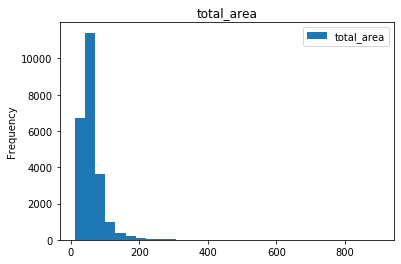

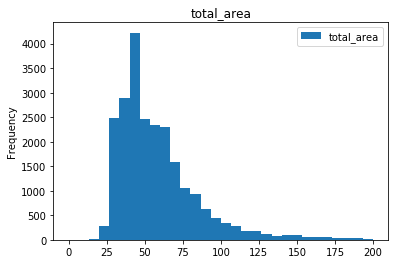

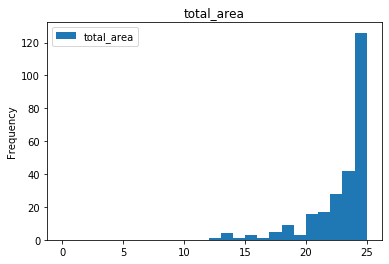

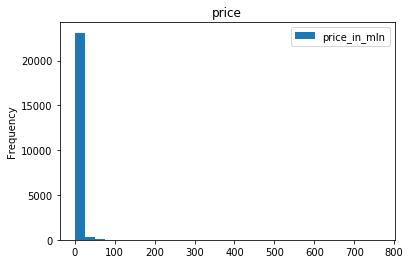

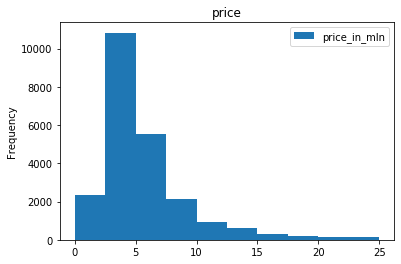

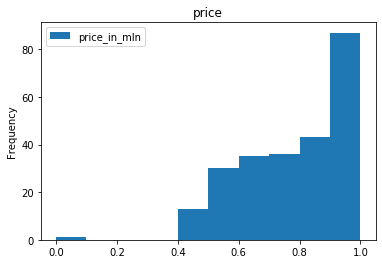

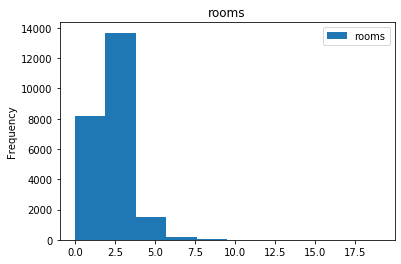

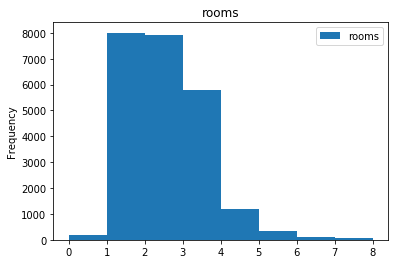

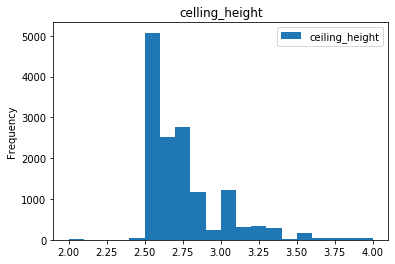

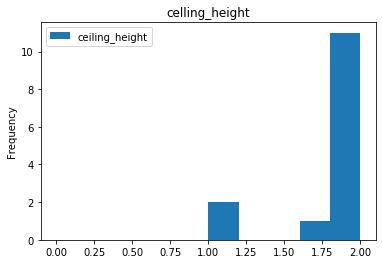

In [4]:
#перевод цены объявления в миллионы в отдельном столбце
df['price_in_mln'] = df['last_price'] / 1000000
#построение гистограмм по параметрам площадь, цена, число комнат, высота потолков
df.plot(kind='hist', y='total_area', bins = 30, title = 'total_area')
df.plot(kind='hist', y='total_area', bins = 30, range=(0, 200), title = 'total_area')
df.plot(kind='hist', y='total_area', bins = 25, range=(0, 25), title = 'total_area')
df.plot(kind='hist', y='price_in_mln', bins = 30, title = 'price')
df.plot(kind='hist', y='price_in_mln', bins = 10, range=(0, 25), title = 'price')
df.plot(kind='hist', y='price_in_mln', bins = 10, range=(0, 1), title = 'price')
df.plot(kind='hist', y='rooms', bins = 10, title = 'rooms')
df.plot(kind='hist', y='rooms', bins = 8, range=(0, 8), title = 'rooms')
df.plot(kind='hist', y='ceiling_height', bins = 20, range= (2, 4),  title = 'celling_height')
df.plot(kind='hist', y='ceiling_height', bins = 10, range= (0, 2),  title = 'celling_height')
print(df['last_price'].isnull().sum())

#### Вывод
Изучены основные параметры выборки:
1. Площадь: больше всего объявлений относится к диапазону 30-60 кв.метров. У распределения длинный хвост --> по мере роста площади частота сокращается. После 200 кв. метров кол-во значений стремится к 0. Минимальную границу можно определить как 15 м, т.к. хотя появляются "эконом" жилье по 8-10 метров, но она пока не так распространено в России, как, например в азиатских странах и видно, что в выборке встречается не часто.
2. Цены: больше всего объявлений относятся к диапазону 3 - 5 млн.рублей. У распределения длинный хвост --> по мере роста цены частота сокращается. После 25 млн. руб значений кол-во значений стремится к 0. Минимальную границу можно определить как 0,5 млн. руб, ниже уже нереалистичная сумма.
3. Комнаты: больше всего объявлений относятся к диапазону объявлений относятся к диапазону 1 - 3х комнатным квартирам. После 8 комнат кол-во значений стремится к 0.
4. Высота потолков: больше всего объявлений относятся к диапазону 2,5 - 3 м. После 4 м кол-во значений стремится к 0. Минимальную границу можно определить как 2 м, ниже уже выбивающиеся единичные значения.

<div class="alert alert-success" style="border-radius: 15px">
<h2> Комментарий ревьюера</h2>
    
Согласна.
</div>

<div class="alert alert-info"> Определил минимальные границы в комментарии</div>

### Очистка данных от редких и выбивающихся значений

In [5]:
#проверка минимальных значений
print('Минимальная площадь:', df['total_area'].min())
print('Минимальная цена:', df['price_in_mln'].min())
print('Минимальная высота потолков:',df['ceiling_height'].min())
print('Расчет по кол-ву комнат:')
print()
print(df['rooms'].value_counts())
print('Апартаменты:')
print(df['is_apartment'].value_counts())
print(df.query('rooms == 0 and is_apartment == False').count())
print()
print(df.query('rooms == 0 and studio == True').count())
# уберем из данных "хвосты" по параметрам площадь, цены, комнаты, высота потолков
df_good = df.query('15 <= total_area <= 200 and 0.5 <= price_in_mln <= 25 and rooms <= 8 and 2 <= ceiling_height <= 4').reset_index(drop=True)
df_good.info()

Минимальная площадь: 12
Минимальная цена: 0.01219
Минимальная высота потолков: 1.0
Расчет по кол-ву комнат:

1     8004
2     7897
3     5779
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64
Апартаменты:
False    23515
True        50
Name: is_apartment, dtype: int64
total_images            194
last_price              194
total_area              194
first_day_exposition    194
rooms                   194
ceiling_height           82
floors_total            194
living_area             183
floor                   194
is_apartment            194
studio                  194
open_plan               194
kitchen_area              0
balcony                 194
locality_name           194
airports_nearest        117
cityCenters_nearest     117
parks_around3000        194
parks_nearest            28
ponds_around3000        194
ponds_nearest            68
days_expositio

#### Вывод
После очистки от нестандартных значений осталось ок. 60% объвлений от первоначальной выборки - 14060 значений.

<div class="alert alert-danger" style="border-radius: 15px">
<h2> Комментарий ревьюера</h2>
    
- Ты откинул 0 комнат. Это могут быть студии.
- Цену, площадь и потолки ты ограничил только сверху. Их надо ограничить и снизу тоже. Чтобы понятнее было, о чем я говорю, выведи минимальную высоту потолков  твоем датафрейме :) 
</div>

<div class="alert alert-info"> Квартиры без комнат не имеют кухни и большинство из них действительно указаны как студии. Определил нижние границы на шаге "Изучение основных параметров" и на основе них убрал слишком дешевые и маленькие по площади и потолкам квартиры. Поправил дальнейшие выводы, там где корректировка их изменила.  </div>

### Анализ времени продажи квартиры

Среднее кол-во дней продажи c нулевыми: 156.42011457670273
Медианное кол-во дней продажи c нулевыми: 73.0
Среднее кол-во дней продажи без нулевых: 187.3205696742282
Медианное кол-во дней продажи без нулевых: 102.0


(11726, 30)

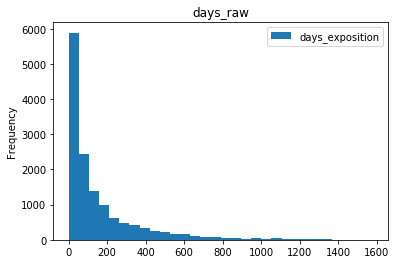

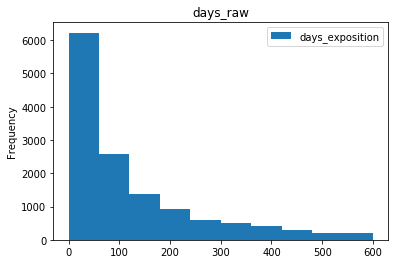

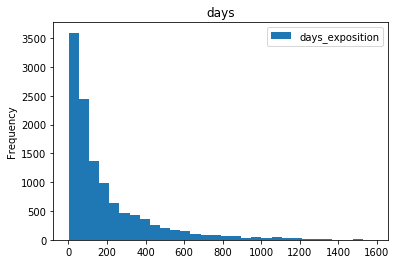

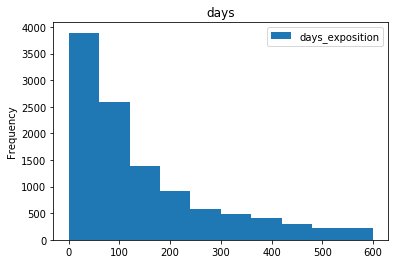

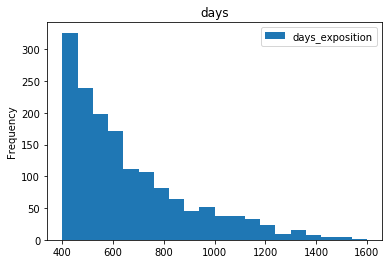

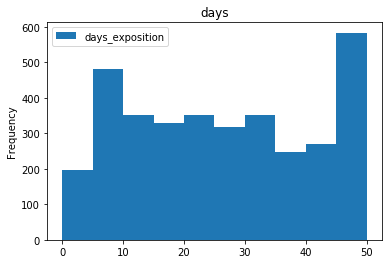

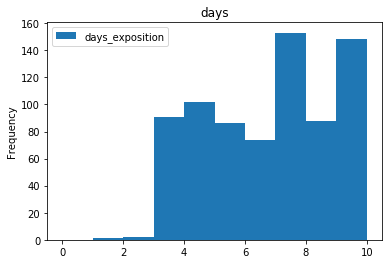

In [6]:
#построение гистограммы по времени продажи квартиры
df_good.plot(kind='hist', y='days_exposition', bins = 30, title = 'days_raw')
df_good.plot(kind='hist', y='days_exposition', bins = 10, range = (0, 600), title = 'days_raw')
print('Среднее кол-во дней продажи c нулевыми:', df['days_exposition'].mean())
print('Медианное кол-во дней продажи c нулевыми:', df['days_exposition'].median())
#срез данных без нулевых и пропущенных
df_good = df_good.query('days_exposition > 0').reset_index(drop=True)
df_good.plot(kind='hist', y='days_exposition', bins = 30, title = 'days')
df_good.plot(kind='hist', y='days_exposition', bins = 10, range = (0, 600), title = 'days')
df_good.plot(kind='hist', y='days_exposition', bins = 20, range = (400, 1600), title = 'days')
df_good.plot(kind='hist', y='days_exposition', bins = 10, range = (0, 50), title = 'days')
df_good.plot(kind='hist', y='days_exposition', bins = 10, range = (0, 10), title = 'days')
print('Среднее кол-во дней продажи без нулевых:', df_good['days_exposition'].mean())
print('Медианное кол-во дней продажи без нулевых:', df_good['days_exposition'].median())
df_good.shape

count    11726.000000
mean       187.320570
std        225.691032
min          1.000000
25%         45.000000
50%        102.000000
75%        241.000000
max       1580.000000
Name: days_exposition, dtype: float64


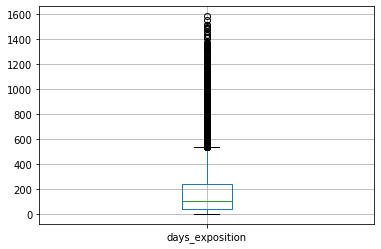

In [7]:
# построим диаграмму размаха на исходных ненулевых данных
df_good.boxplot(column = 'days_exposition')
print(df_good['days_exposition'].describe())

(10941, 30)
count    10941.000000
mean       187.941870
std        202.933925
min         10.000000
25%         48.000000
50%        110.000000
75%        249.000000
max       1100.000000
Name: days_exposition, dtype: float64


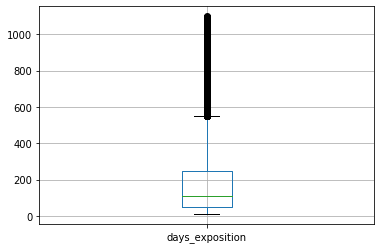

In [8]:
# срез данных с 45 по 500 дней
df_good = df_good.query('10 <= days_exposition <= 1100').reset_index(drop=True)
print(df_good.shape)
#df_good.plot(kind='hist', y='days_exposition', bins = 10, title = 'days')
print(df_good['days_exposition'].describe())
df_good.boxplot(column = 'days_exposition')

#### Вывод
Разница между средним по дням продажи и медианным почти в 2 раза --> много значений с низкими показателями - нулевые значения, быстрые продажи + наличие выбросов с длительным сроком продажи.

Нулевые значения убраны - осталось 11 726 наблюдений (ок.50% от первоначальной выборки)

Для верхнего порога взяты 500 дней - выше верхнего уса диаграммы (на исходных ненулевых данных) -  выбросы и хвост, стремящийся к нулю.
По нижнему порогу первый пик объявлений приходится на 45 дней - это можно считать оптимистичным сроком продажи, все, что ниже -  быстро. Раньше 45 дней есть пик в 10 дней - все, что ниже это аномально быстро.

Таким образом, в диапазоне 10 - 1100 дней лежит 10 941 наблюдение - ок.93% данных очищенных от нулевых сроков и нестандартных объявлений или 42% от первоначальной выборки. За "обычное значение" логично взять медиану 110 дней - реалистичный срок.

### Анализ факторов, влияющих на стоимость квартиры

#### Площадь, комнаты, цена

            last_price  total_area     rooms
last_price    1.000000    0.782564  0.498697
total_area    0.782564    1.000000  0.793967
rooms         0.498697    0.793967  1.000000


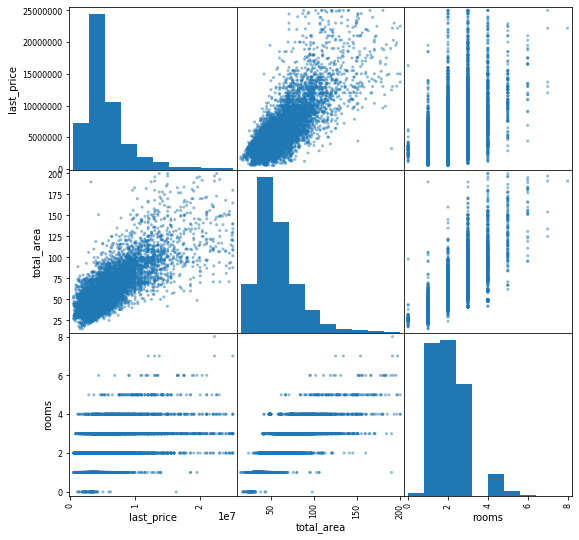

In [9]:
# построение матрицы рассеивания и таблицы корреляций между параметрами цена, площадь квартиры, число комнат
df_correlation = df_good[['last_price', 'total_area', 'rooms']]
pd.plotting.scatter_matrix(df_correlation, figsize=(9, 9)) 
print(df_correlation.corr())

#### Дата размещения объявления

             median_price  number
floor_group                      
другой               4.80    8019
последний            4.35    1531
первый               3.90    1391


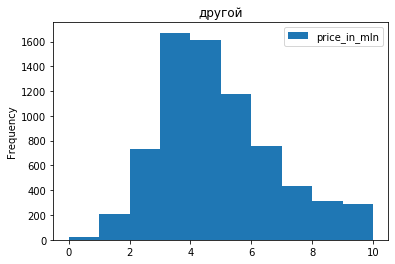

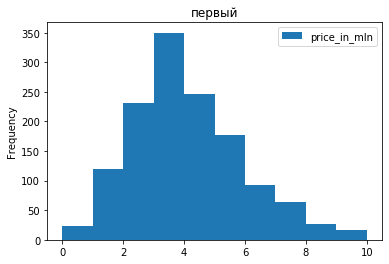

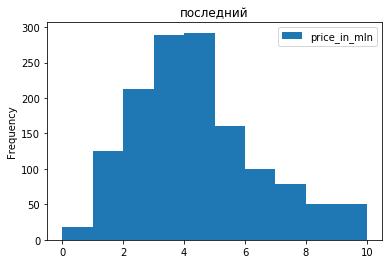

In [10]:
#построение сводной по медианной цене и этажу(первый, последний, другой) + частотные графики по группам
floor_price_pivot = df_good.pivot_table(index='floor_group', values='price_in_mln', aggfunc=['median', 'count'])
floor_price_pivot.columns = ['median_price', 'number']
print(floor_price_pivot.sort_values('median_price', ascending = False))
for name, group_data in df_good.groupby('floor_group'):
    group_data.plot(kind='hist', y='price_in_mln', bins = 10, range = (0, 10), title = name)
#смена названий столбцов    
def column_name_change(data):
    data.set_axis(['median_price', 'number'], axis = 'columns', inplace = True)
    return data

         median_price  number
weekday                      
1               4.800    1980
3               4.700    2023
0               4.600    1740
2               4.600    1791
5               4.600     889
4               4.550    1792
6               4.515     726

       median_price  number
month                      
5            4.7500     560
9            4.7500    1023
2            4.7000    1296
11           4.7000    1125
8            4.6925     920
7            4.6900     877
4            4.6500     722
1            4.6000     700
10           4.6000    1070
12           4.6000     737
3            4.5000    1106
6            4.5000     805

      median_price  number
year                      
2014      7.050000      40
2015      5.100000     432
2019      4.850000     629
2016      4.755962    1265
2017      4.600000    3977
2018      4.590000    4598
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


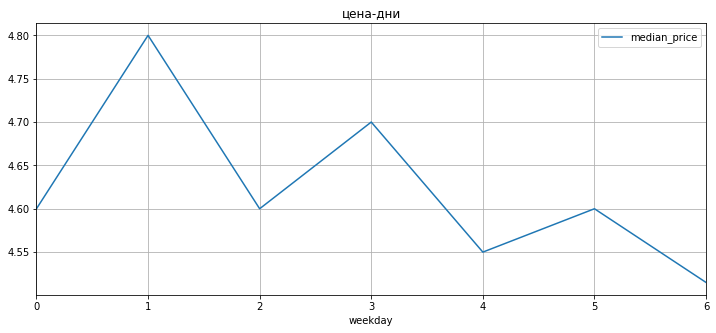

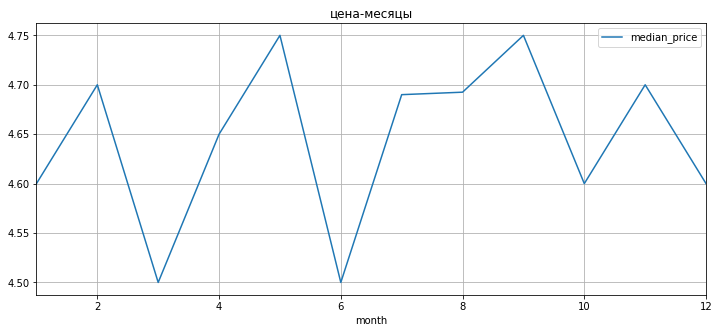

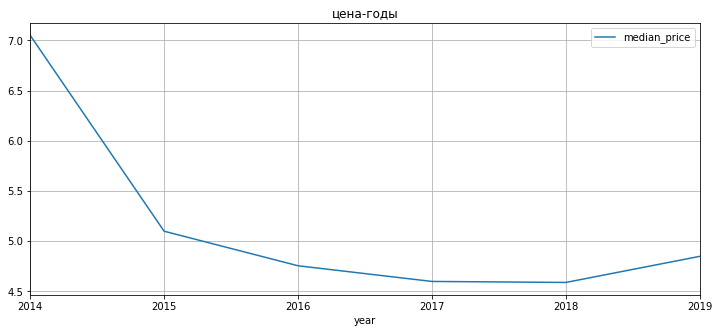

In [11]:
#сводная по дням недели
weekday_price_pivot = df_good.pivot_table(index='weekday', values='price_in_mln', aggfunc=['median', 'count'])
print(column_name_change(weekday_price_pivot).sort_values('median_price', ascending = False))
print()
#сводная по месяцам 
month_price_pivot = df_good.pivot_table(index='month', values='price_in_mln', aggfunc=['median', 'count'])
print(column_name_change(month_price_pivot).sort_values('median_price', ascending = False))
print()
#сводная по годам 
year_price_pivot = df_good.pivot_table(index='year', values='price_in_mln', aggfunc=['median', 'count'])
print(column_name_change(year_price_pivot).sort_values('median_price', ascending = False))

#диаграмы рассеивания
print(weekday_price_pivot.plot(y='median_price', grid=True, figsize=(12, 5), title = "цена-дни"))
print(month_price_pivot.plot(y='median_price', grid=True, figsize=(12, 5), title = "цена-месяцы"))
print(year_price_pivot.plot(y='median_price', grid=True, figsize=(12, 5), title = "цена-годы"))

#### Вывод
1. Видна значимая корреляция между ценой квартиры и кол-вом квадратных метров > 0,5.

2. Между ценой и кол-вом комнат корреляция слабая. Видно, что по мере увеличения кол-ва комнат с 0 до 4 расширяется диапазон цен.

3. Есть зависимость между ценой и этажей, первые и последние этажи - дешевле, чем другие. Это видно по медианным значениям в группах (3,9 и 4,3 млн. vs 4,8) и на графиках распределения - частота у них сильнее смещена влево - к меньшим значениям.

4. На основе медианных значений видно, что больше дорогих квартир публикуются размещаются во вторник, а дешевых - в воскресенье. Среди месяцев самый дорогой - май-сентябрь, а дешевый - март и июнь. По годам, объявления в 2014-2015 годах - самые дорогие, а в 2017-2018 - самые дешевые.

### Анализ местоположения

In [28]:
#сводная по населенным пунктам и кол-ву объявления, и средней ценой кв.метра
location_pivot = df_good.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['mean', 'count'])
location_pivot.columns = ['mean_price_meter', 'number']
top_locations = location_pivot.sort_values('number', ascending = False).head(10)
print(top_locations)

                   mean_price_meter  number
locality_name                              
Санкт-Петербург       109053.065949    7521
Всеволожск             66945.733333     210
посёлок Мурино         87759.661290     186
посёлок Шушары         78558.437158     183
Пушкин                101153.447674     172
Колпино                75353.299401     167
Петергоф               83942.819672     122
Гатчина                68915.982456     114
деревня Кудрово        91162.079646     113
посёлок Парголово      89606.324074     108


                mean_price  number
cityCenters_km                    
0.0              10.408889       9
1.0              11.416909      88
2.0              10.615186     140
3.0               8.900999     162
4.0               9.960631     310
5.0               9.840952     380
6.0               8.542526     233
7.0               7.824171     166
8.0               8.261254     297
9.0               6.747569     287
10.0              6.328336     379
11.0              5.991429     570
12.0              5.694770     805
13.0              5.959209     754
14.0              5.514246     662
15.0              5.614570     807
16.0              5.115884     625
17.0              5.102716     425
18.0              4.825289     112
19.0              4.837702      80
20.0              4.690000      19
21.0              5.451580      54
22.0              5.022490      77
23.0              4.653308      39
24.0              4.648000       5
25.0              4.267500       8
26.0              3.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


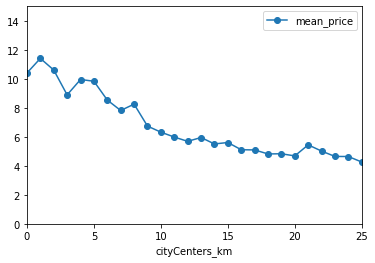

In [13]:
#делаем срез по Санкт-Петербургу и ненулевым значениям
spb_data = df_good.query('locality_name == "Санкт-Петербург" and cityCenters_nearest >= 1')
#округлим расстояния до центра в км
spb_data['cityCenters_km'] = spb_data['cityCenters_nearest'] / 1000
spb_data['cityCenters_km'] = round(spb_data['cityCenters_km'])
#построим сводную со средней ценой по каждому км. от центра
distance_price_pivot = spb_data.pivot_table(index='cityCenters_km', values='price_in_mln', aggfunc=['mean', 'count'])
distance_price_pivot.columns = ['mean_price', 'number']
print(distance_price_pivot)
distance_price_pivot.info()
#построим график по цене и удаленности от центра
distance_price_pivot.plot(y = 'mean_price', ylim=(0, 15), xlim=(0, 25), style='o-')

#### Вывод
Больше всего объявлений в Санкт-Петербурге (7521 - ок.70% от очищенной выборки)

По средней стоимости метра можно выделить тройку лидеров - Санкт-Петербург, Пушкин > 100 тыс. руб. за кв. метр
Дешевле всего жилье во Всеволжске - 67 тыс. руб. за кв.метр.

По результатам анализа цен в зависимости от расстояния от центра, в С-Петербурге можно выделить 5 км. зону после которой наблюдается стабильный убывающий тренд в ценах по мере удаления от центра (за исключением отдельных выбросов дальше 25 км.)

### Анализ центральной области

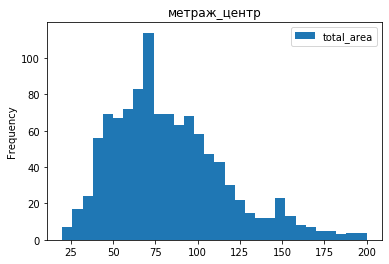

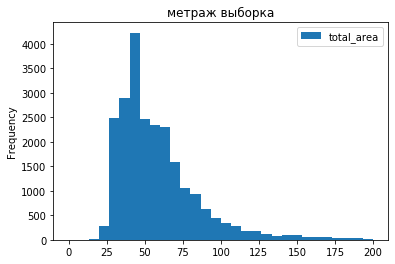

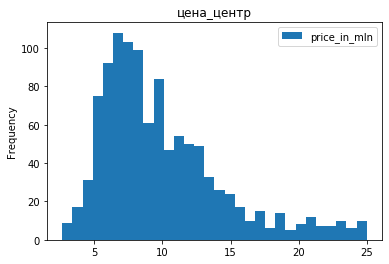

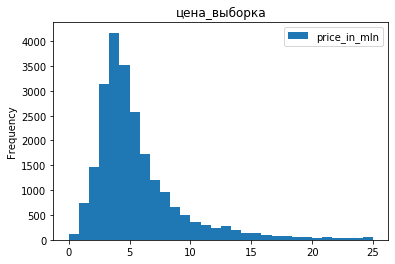

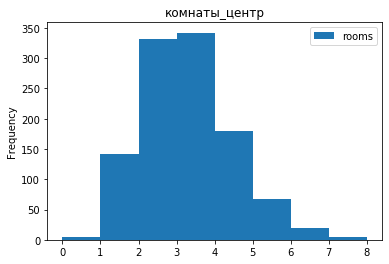

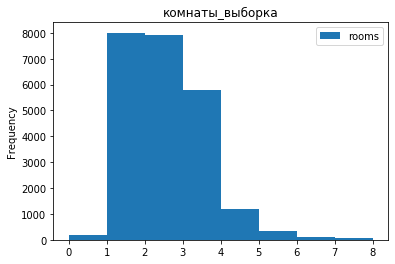

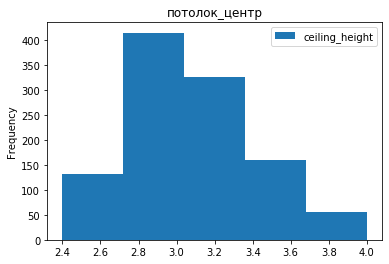

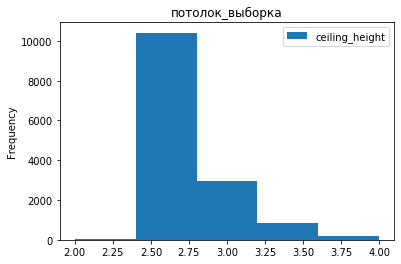

In [14]:
#срез по центральной области
spb_data_center = spb_data.query('cityCenters_km <= 5')
#построение гистограмм по параметрам площадь, цена, число комнат, высота потолков и сравнение с выборкой
spb_data_center.plot(kind='hist', y='total_area', bins = 30, title = 'метраж_центр')
df.plot(kind='hist', y='total_area', bins = 30, range=(0, 200), title = 'метраж выборка')
spb_data_center.plot(kind='hist', y='price_in_mln', bins = 30, title = 'цена_центр')
df.plot(kind='hist', y='price_in_mln', bins = 30, range=(0, 25), title = 'цена_выборка')
spb_data_center.plot(kind='hist', y='rooms', bins = 8, title = 'комнаты_центр')
df.plot(kind='hist', y='rooms', bins = 8, range=(0, 8), title = 'комнаты_выборка')
spb_data_center.plot(kind='hist', y='ceiling_height', bins = 5,  title = 'потолок_центр')
df.plot(kind='hist', y='ceiling_height', bins = 5, range=(2, 4),  title = 'потолок_выборка')

Корреляция по центральной области:
            last_price  total_area     rooms
last_price    1.000000    0.678813  0.398889
total_area    0.678813    1.000000  0.780312
rooms         0.398889    0.780312  1.000000
Корреляция по выборке:
            last_price  total_area     rooms
last_price    1.000000    0.782564  0.498697
total_area    0.782564    1.000000  0.793967
rooms         0.498697    0.793967  1.000000
Матрица рассеивания по центральной области:


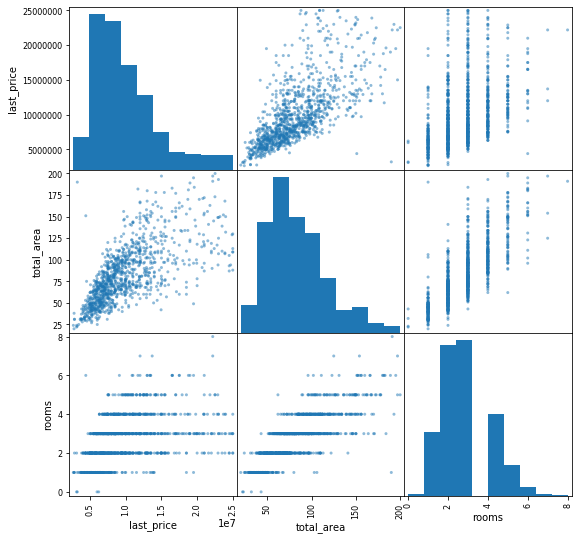

In [15]:
# построение матрицы рассеивания и таблицы корреляций между параметрами цена, площадь квартиры, число комнат
spb_data_center_correlation = spb_data_center[['last_price', 'total_area', 'rooms']]
pd.plotting.scatter_matrix(spb_data_center_correlation, figsize=(9, 9)) 

print('Корреляция по центральной области:') 
print(spb_data_center_correlation.corr())
print('Корреляция по выборке:')
print(df_correlation.corr())
print('Матрица рассеивания по центральной области:')

In [16]:
#сводная по дням недели
weekday_price_pivot_center = spb_data_center.pivot_table(index='weekday', values='price_in_mln', aggfunc=['median', 'count'])
weekday_price_pivot_center.columns = ['median_price_center', 'number_center']
weekday_price_pivot_center = weekday_price_pivot_center.join(weekday_price_pivot)
print(weekday_price_pivot_center.sort_values('median_price_center', ascending = False))

#сводная по месяцам 
month_price_pivot_center  = spb_data_center.pivot_table(index='month', values='price_in_mln', aggfunc=['median', 'count'])
month_price_pivot_center.columns = ['median_price_center', 'number_center']
month_price_pivot_center = month_price_pivot_center.join(month_price_pivot)
print(month_price_pivot_center.sort_values('median_price_center', ascending = False))

#сводная по годам 
year_price_pivot_center  = spb_data_center.pivot_table(index='year', values='price_in_mln', aggfunc=['median', 'count'])
year_price_pivot_center.columns = ['median_price_center', 'number_center']
year_price_pivot_center = year_price_pivot_center.join(year_price_pivot)
print(year_price_pivot_center.sort_values('median_price_center', ascending = False))

         median_price_center  number_center  median_price  number
weekday                                                          
1                   9.400000            208         4.800    1980
6                   9.400000             49         4.515     726
0                   8.950000            177         4.600    1740
3                   8.700000            245         4.700    2023
2                   8.625000            174         4.600    1791
4                   8.500000            170         4.550    1792
5                   7.650407             66         4.600     889
       median_price_center  number_center  median_price  number
month                                                          
2                   9.5000            121        4.7000    1296
9                   9.4000            109        4.7500    1023
7                   8.9750             90        4.6900     877
12                  8.9750             80        4.6000     737
10                  8.

In [17]:
#построение сводной по медианной цене и этажу(первый, последний, другой) + частотные графики по группам
floor_price_center_pivot = spb_data_center.pivot_table(index='floor_group', values='price_in_mln', aggfunc=['median', 'count'])
floor_price_center_pivot.columns = ['median_price_center', 'number_center']
floor_price_center_pivot = floor_price_center_pivot.join(floor_price_pivot)
print(floor_price_center_pivot.sort_values(by = 'median_price_center', ascending = False))

             median_price_center  number_center  median_price  number
floor_group                                                          
другой                       9.3            734          4.80    8019
последний                    9.0            225          4.35    1531
первый                       6.8            130          3.90    1391


#### Вывод
При сравнении результатов анализа центральной зоной с выборкой в целом обнаружены следующие факты:
1. Метраж: в центральной области чаще встречаются квартиры в диапазоне 45 - 100 кв.м, с пиком около 75, а в общей выборке чаще встречаются объявления в диапазоне 30-60 кв.метров с пиком около 45 м.
2. Цена: в центральной области чаще встречаются квартиры в диапазоне 5 - 10 млн. с пиком около 7 млн., а в общей выборке чаще встречаются объявления в диапазоне 2-6 млн. с пиком около 3-4 млн.
3. Комнаты: в центральной области чаще встречаются 2-3х комнатные квартиры, а в общей выборке чаще встречаются 1-2 комнатные.
4. Потолок: распределение в центральной части бимодальное - пики около 2,9 и 3,3 м, а в общей выборке пик приходится на 2,5 - 2,7 метров. В центральной части скорее всего преобладает историческая застройка и меньше типовых жилых домов, поэтому высота потолков различается.
5. В обоих выборках прослеживается корреляция между метражом и ценой квартиры, в общей выборке она сильнее 0,78 vs 0,68. Корреляция между кол-вом комнат и ценой слабая <0,5.
6. По дням объявления: Самые дорогие объявления в центре размещались во вторник и воскресенье, в общей выборке во вторник. Самые дешевые в субботу - центр, воскресенье - общая выборке.
7. По месяцам: Самые дорогие объявления в центре размещались в феврале, а в общей выборке в мае и сентябре. Самые дешевые в августе - центр, март, июнь - общая выборка.
8. По годам: Самые дорогие объявления в центре размещались в 2016, а в общей выборке в 2014. Самые дешевые в 2014 - центр, 2018 - общая выборке.

## Общий вывод

### Преобразование данных

1. Пропуски: в данных были выявлены пропуски. В параметрах парки/водоемы в радиусе 3км, апартаменты, балкон пропуски заменены нулями, т.к. вероятно, что если значения нет, то это отсутствие признака. В других параметрах пропуски остались без изменения - картографические данные, тех.параметры квартиры.
2. Очистка данных: 
    - удалены строки без местоположения и этажности дома, т.к. без этих параметров ценность наблюдений для ответа на поставленные вопросы падает + их доля была невелика.
    - отброшены выдающиеся значения - "хвосты" - элитное жилье с огромной площадью, кол-вом комнат и высотой потолков и аномально дешевое и маленькое жилье
3. Оптимизированы типы данных + добавлены расчетные параметры (цена кв.метра, день, месяц, год объявления, соотношения жилой и общей площади, кухни к общей.

### Результаты

В ходе исследования выявлены следущие факторы влияющие на цену квартиры:
1. Метраж - корреляция в обеих выборках - прямая зависимость.

2. Удаленность от центра - по мере удаления от центра цена падает.

3. Этаж - квартиры на первом и последнем этаже в медианных значениях дешевле.

4. Местоположение - Санкт-Петербург, Пушкин > 100 тыс. руб. за кв. метр. Дешевле всего жилье во Всеволжске

Установлен диапазон по срокам продажи квартиры (от размещения до снятия объявления) - 10 - 1100 дней. Значения до 10 дней - аномально быстрые, значения свыше 1100 дней - слишком долгие. Медианный срок продажи 110 дней.

Определена центральная зона в Санкт-Петербурге - до 5 км. от центра города.

Проведен сравнительный анализ по центральной зоне и выборке в целом: 
    1. в центре чаще встречаются квартиры дороже, больше по площади, кол-ву комнат, высоте потолков
    2. сохраняется корреляция с метражом
    3. слабая корреляция кол-ва комнат и цены в обоих выборках
    4. различие по частоте дорогих/дешевых квартир в зависимости от даты размещения объявления
    
Таким образом, параметры для построения автоматизированной системы отслеживания аномалий определены. Цель исследования выполнена.